<a href="https://www.kaggle.com/theyazilimci/health-disease-prediction?scriptVersionId=83384597" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Health Disease
<p style="font-family: Verdana; class='p-class' ">In this notebook we will try to predict if a person have a heart disease ❤️</p> <br> 
<p class='p-class'>First we are going to Analyse the Data and after try to make predictions by using  <b>Logistic Regression</b> </p>

<hr>

### Library Used
<p style="font-family: Verdana;">
<li>Pandas</li>
<li>Numpy</li>
<li>SkitLearn</li>
<li>Seaborn</li>
<li>Matplotlib</li>
</p>

<hr>

### Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Data Observation

In [2]:
df = pd.read_csv('../input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<div class="alert alert-block alert-info" style="font-size:14px; font-family:Verdana;">
    📌 918 Data.Mean Age: 53,Min Age: 27,Max Age: 77,The DataSet is for person between 25-80 years old 
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 The data don't contain null value 😎 and have only five columns of type String.
</div>

Replace Abbrevations before Analysing the Data

In [5]:
df['ChestPainType'] = df.ChestPainType.replace({'ASY': 'Asymptomatic',
                                             'ATA': 'Atypical angina',
                                             'NAP': 'Non-Anginal Pain',
                                              'TA': 'Typical Angina'})
df['ChestPainType'].value_counts()

Asymptomatic        496
Non-Anginal Pain    203
Atypical angina     173
Typical Angina       46
Name: ChestPainType, dtype: int64

<hr>

### Data Analyse

<AxesSubplot:xlabel='Sex', ylabel='count'>

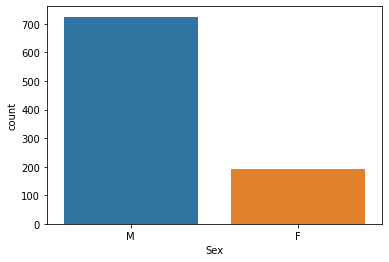

In [6]:
sns.countplot(x='Sex',data=df)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 The Data is not balance, Male represent 700 person However Female have only 200 
</div>

<AxesSubplot:xlabel='Sex', ylabel='count'>

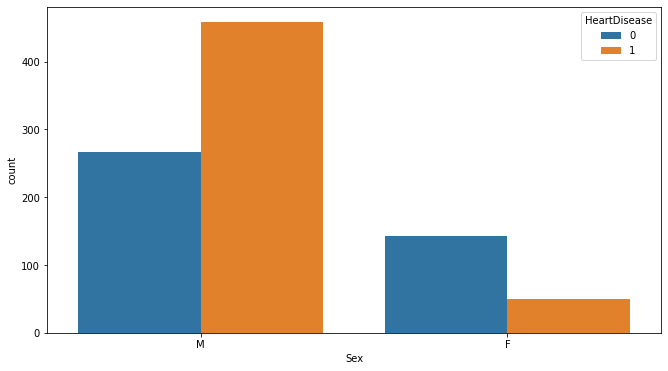

In [7]:
fig=plt.figure(figsize=(11,6))
sns.countplot(x='Sex',hue='HeartDisease',data=df)

<AxesSubplot:>

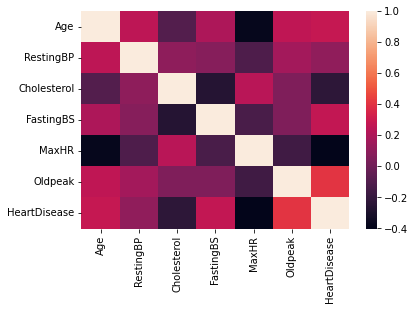

In [8]:
sns.heatmap(df.corr())

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Columns aren't realy related between them apart OldPeak and Heart Disease
</div>

<AxesSubplot:xlabel='Age', ylabel='Density'>

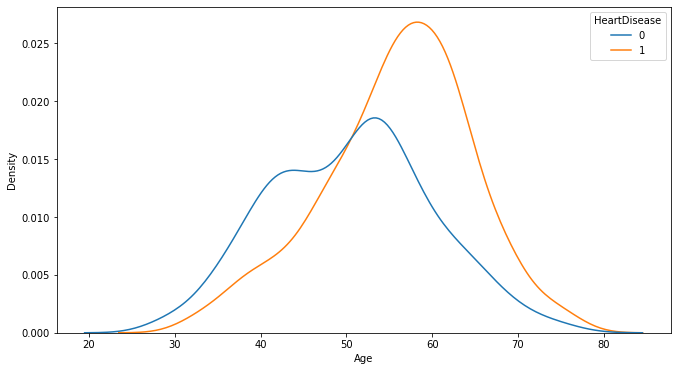

In [9]:
fig=plt.figure(figsize=(11,6))
sns.kdeplot(df['Age'],hue = df['HeartDisease'])

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

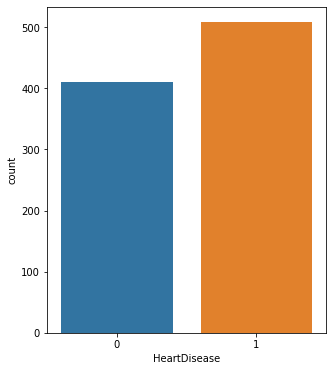

In [10]:
fig=plt.figure(figsize=(5,6))
sns.countplot(x='HeartDisease', data=df)

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

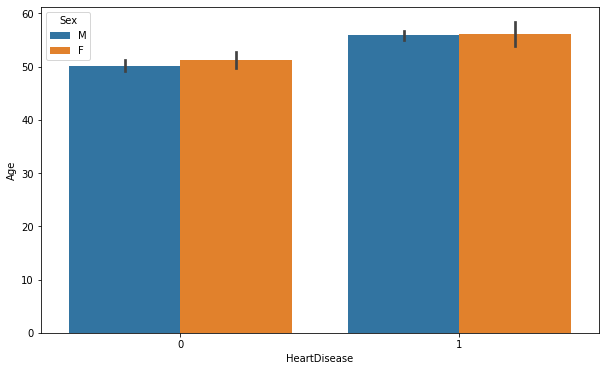

In [11]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='HeartDisease',y='Age',hue='Sex',data=df)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Male and Female both are sick in the ages of 55-58 
</div>

<hr>

### Prediction

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### Transform Categorical Data

In [13]:
df = pd.get_dummies(df, prefix=['Sex', 'ChestPainType','RestingECG','ST_Slope','ExerciseAngina'])
df.drop('Sex_F',axis=1,inplace=True)

df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_Asymptomatic,ChestPainType_Atypical angina,ChestPainType_Non-Anginal Pain,ChestPainType_Typical Angina,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_N,ST_Slope_Y,ExerciseAngina_Down,ExerciseAngina_Flat,ExerciseAngina_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


#### Define X and Y

In [14]:
x = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.3)

#### Logistic Regression

In [16]:
logisticRegression = LogisticRegression(solver='liblinear')

logisticRegression.fit(x_train,y_train)
prediction = logisticRegression.predict(x_test)

##### Create DataFrame with predicted and expected value
<p style='font-family:Verdana'>You can after anlayse it easily 🔮 </p>

In [17]:
predictFrame = {'Expected': y_test, 'Got': prediction}

predictFrame = pd.DataFrame(data=predictFrame)

predictFrame.head()

,Expected,Got
668,0,0
30,1,0
377,1,1
535,1,1
807,0,0


<hr>

#### Score Report

In [18]:
mistakes = 0

Array = y_test.to_numpy()
for i in range(len(prediction)):
    if (prediction[i] != Array[i]):
        mistakes += 1
        
        
'Number of Mistakes = ',mistakes

('Number of Mistakes = ', 31)

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test, prediction)

0.8876811594202898

In [21]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       112
           1       0.93      0.88      0.90       164

    accuracy                           0.89       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.89      0.89       276

